# Transform the targets to the Yolo Format

This notebook helps to understand how the data are prepared for Yolo using a test dataset.

In [33]:
import sys
if '..' not in sys.path:
    sys.path.append('..')

from tfyolo3.dataloaders import YoloDatasetSingleFile
from tfyolo3.dataloaders import common
from tfyolo3 import YoloV3
from tfyolo3 import layers
from pathlib import Path
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

import imgaug as ia
from imgaug import augmenters as iaa
from imgaug.augmentables.bbs import BoundingBox, BoundingBoxesOnImage

# tf.enable_v2_behavior()

The classes contained in the dataset

In [34]:
categories_path = Path('../datasets/test_dataset/classes.txt')
categories = common.load_classes(categories_path, True)

list(categories.items())[:10]

[(0, 'chat'), (1, 'rat'), (2, 'test'), (3, 'none')]

Resize the dataset

In [35]:
filepath = Path('../datasets/test_dataset/data_annotations_train.txt')

Define the target shape, the max boxes per image, batch size for the dataset generator

In [36]:
target_shape = (256, 256)
max_objects = 10
batch_size = 1
gridlen = 8
num_classes = len(categories.keys())

Load a batch the annotations and resize images and annotations to the target shape

In [37]:
ds = YoloDatasetSingleFile(
    filepath,
    target_shape,
    max_objects,
    batch_size,
    YoloV3.default_anchors,
    YoloV3.default_masks,
    num_classes,
    is_training=False)

In [38]:
image_batch, boxes_batch = ds[0]

2019-11-25 13:00:21,357 - Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


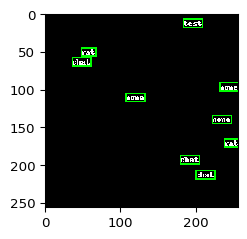

array([[183.,   8., 207.,  18.,   2.],
       [199., 208., 223., 218.,   0.],
       [ 48.,  46.,  66.,  56.,   1.],
       [221., 135., 245., 145.,   3.],
       [237., 166., 255., 176.,   1.],
       [ 36.,  59.,  60.,  69.,   0.],
       [107., 106., 131., 116.,   3.],
       [231.,  92., 255., 102.,   3.],
       [179., 188., 203., 198.,   0.],
       [  0.,   0.,   0.,   0.,   0.]])

In [39]:
for img, boxes in zip(image_batch, boxes_batch):
    boxes_transformed = BoundingBoxesOnImage([BoundingBox(x[0], x[1], x[2], x[3]) for x in boxes], 
        shape=img.shape)
    ia.imshow(boxes_transformed.draw_on_image(img, size=2))
boxes

## Data Agumentation

In [40]:
import imgaug as ia
from imgaug import augmenters as iaa
from imgaug.augmentables.bbs import BoundingBox, BoundingBoxesOnImage

In [41]:
pipeline = iaa.Sequential([
    iaa.Affine(rotate=(90))
])

In [42]:
ds = YoloDatasetSingleFile(
    filepath,
    target_shape,
    max_objects,
    batch_size, 
    YoloV3.default_anchors,
    YoloV3.default_masks, 
    num_classes, 
    is_training=False,
    augmenters=pipeline)

In [43]:
image_batch, boxes_batch = ds[0]

2019-11-25 13:00:22,722 - Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


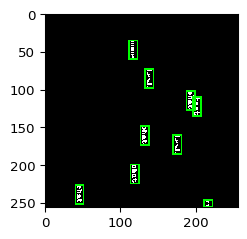

array([[210., 247., 220., 255.,   1.],
       [111.,  36., 121.,  60.,   3.],
       [126., 149., 136., 173.,   0.],
       [187., 103., 197., 127.,   0.],
       [169., 161., 179., 185.,   2.],
       [113., 200., 123., 224.,   0.],
       [132.,  74., 142.,  98.,   2.],
       [195., 111., 205., 135.,   2.],
       [ 40., 227.,  50., 251.,   0.],
       [  0.,   0.,   0.,   0.,   0.]])

In [44]:
for img, boxes in zip(image_batch, boxes_batch):
    boxes_transformed = BoundingBoxesOnImage([BoundingBox(x[0], x[1], x[2], x[3]) for x in boxes], 
        shape=img.shape)
    ia.imshow(boxes_transformed.draw_on_image(img, size=2))
boxes

## Conclusion

This show how the data are encoded by Yolo. These methods are wrapped into a [tf.keras.utils.Sequence](https://www.tensorflow.org/api_docs/python/tf/keras/utils/Sequence).